[tensor(3.4125, device='cuda:0'), tensor(0.7259, device='cuda:0'), tensor(0.6644, device='cuda:0'), tensor(0.2397, device='cuda:0'), tensor(0.0666, device='cuda:0'), tensor(0.0344, device='cuda:0'), tensor(0.0218, device='cuda:0'), tensor(0.0208, device='cuda:0'), tensor(0.0309, device='cuda:0'), tensor(0.0423, device='cuda:0'), tensor(0.0919, device='cuda:0'), tensor(0.1382, device='cuda:0'), tensor(0.1995, device='cuda:0'), tensor(0.1300, device='cuda:0'), tensor(0.2776, device='cuda:0'), tensor(0.4228, device='cuda:0'), tensor(0.8424, device='cuda:0'), tensor(1.2742, device='cuda:0'), tensor(1.6177, device='cuda:0'), tensor(0.7334, device='cuda:0'), tensor(0.3396, device='cuda:0'), tensor(0.1374, device='cuda:0'), tensor(0.0769, device='cuda:0'), tensor(0.0239, device='cuda:0'), tensor(0.0286, device='cuda:0'), tensor(0.0443, device='cuda:0'), tensor(0.0705, device='cuda:0'), tensor(0.0578, device='cuda:0'), tensor(0.0847, device='cuda:0'), tensor(0.0743, device='cuda:0'), tensor(0.

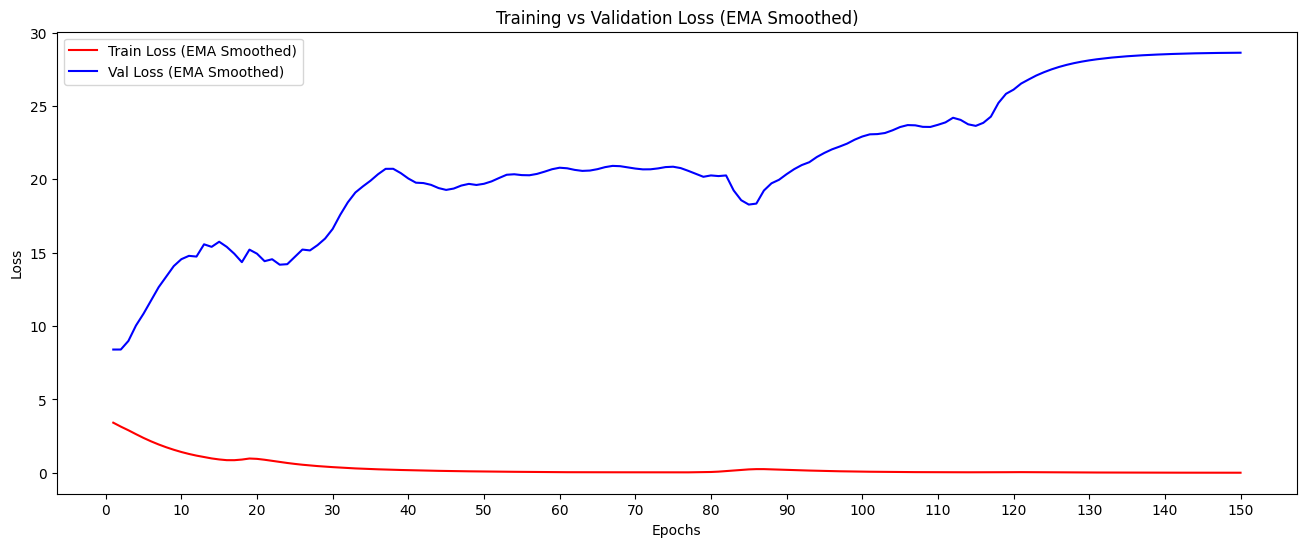

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import torch
from matplotlib.pyplot import MultipleLocator
re = np.load('experiments/seed42/hist_Generator_0208-160206_load_multi_LRgama0.3faninweightdecay0.0001_localini.npy', allow_pickle=True)
#re = np.load('np_comb_ini_96_5_5_check/hist_Generator_0206-160405_load.npy', allow_pickle=True)
#re=np.load('experiments/no_seed/multi_LRgama0.3faninweightdecay0.0001/hist_Generator_0207-151151_load.npy', allow_pickle=True)
re = re.tolist()  # Convert to dictionary if necessary
print(re['train'])
print(re['val'])

# Convert tensors to NumPy arrays for plotting
# train_values_1 = [val[0].cpu().numpy() for val in re['train']]
# train_tre = [val[1]for val in re['train']]
# val_values_1 = [val[0].cpu().numpy() for val in re['val']]
# val_tre = [val[1] for val in re['val']]

train_values_1 = [val.cpu().numpy() for val in re['train']]
val_values_1 = [val.cpu().numpy() for val in re['val']]

print(train_values_1[19])


def exponential_moving_average(data, alpha=0.2):
    smoothed = []
    for i, value in enumerate(data):
        if i == 0:
            smoothed.append(value)
        else:
            smoothed.append(alpha * value + (1 - alpha) * smoothed[i - 1])
    return np.array(smoothed)

# Apply EMA smoothing
train_loss_smooth_ema = exponential_moving_average(train_values_1, alpha=0.1)
val_loss_smooth_ema = exponential_moving_average(val_values_1, alpha=0.1)
# train_tre_smooth_ema = exponential_moving_average(train_tre, alpha=0.1)
# val_tre_smooth_ema = exponential_moving_average(val_tre, alpha=0.1)


# Plot EMA smoothed loss
plt.figure(figsize=(16, 6))
epochs = np.arange(1, len(train_values_1) + 1)  # Generates epoch numbers from 1 to the length of train_loss
plt.plot(epochs, train_loss_smooth_ema, color='red', label="Train Loss (EMA Smoothed)")
plt.plot(epochs, val_loss_smooth_ema, color='blue', label="Val Loss (EMA Smoothed)")
#set scale 
x_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Training vs Validation Loss (EMA Smoothed)")

plt.legend()
plt.show()

# plt.figure(figsize=(16, 6))
# plt.plot(epochs, train_tre_smooth_ema, color='green', label="Train TRE (EMA Smoothed)")
# plt.plot(epochs, val_tre_smooth_ema, color='purple', label="Val TRE (EMA Smoothed)")
# x_major_locator=MultipleLocator(10)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# plt.xlabel("Epochs")
# plt.ylabel("TRE")

# plt.title("Training vs Validation TRE (EMA Smoothed)")
# plt.legend()
# plt.show()


In [1]:
import SimpleITK as sitk
gt=sitk.ReadTransform('/home/rl23/Desktop/data/CorrectTransformationPipeline/val_check/val/Case2/2_lpsItk_initial_r5_t5.tfm')
print(gt.GetNthTransform(1).GetParameters())


(0.05991828243455704, 0.042194121464617464, 0.03446974755851873, -3.139181613922119, 3.556622266769409, -3.098252296447754)
